In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Read and analyze the data

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
customer_data.shape

(200, 5)

In [8]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Choose necessary columns for clustering

In [14]:
X = customer_data.iloc[:,-2:].values

In [13]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

In [15]:
X.shape

(200, 2)

## Determine number of clusters using WCSS

In [23]:
# Find the minimum WCSS value for different cluster sizes

wcss = []
clusters = range(1, 11)

for i in clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

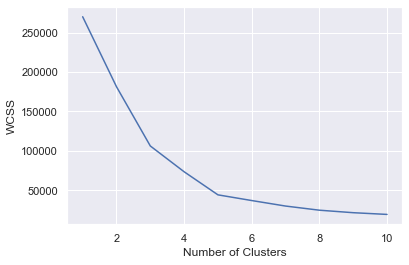

In [26]:
sns.set()
plt.plot(clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [27]:
# Optimum number of clusters is 5 since there are no sharp drops after 5
n_clusters = 5

## Train K-Means model

In [29]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)

In [30]:
Y = kmeans.fit_predict(X)

In [34]:
Y[:10]

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3], dtype=int32)

## Visualize clusters

Text(0, 0.5, 'Spending Score')

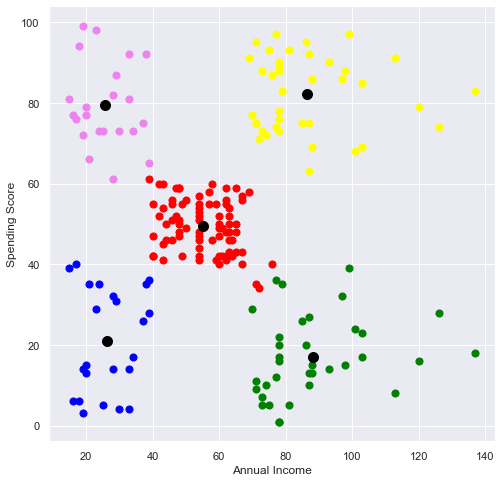

In [36]:
plt.figure(figsize=(8,8))

colors = ['green', 'red', 'yellow', 'violet', 'blue']

for i in range(0, n_clusters):
    plt.scatter(X[Y==i,0], X[Y==i,1], s=50, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')